In [1]:
from pathlib import Path
import pandas as pd
import re
import numpy as np
%matplotlib inline

In [2]:
base_dir = Path('D:\desenvolvimento\datasets\TRAIN1200 -1200_CORRIGIDO')
base_dir

WindowsPath('D:/desenvolvimento/datasets/TRAIN1200 -1200_CORRIGIDO')

In [3]:
iter_files = base_dir.glob('*.jpg')
file = next(iter_files)
file

WindowsPath('D:/desenvolvimento/datasets/TRAIN1200 -1200_CORRIGIDO/0007_RSG.jpg')

In [4]:
file.name

'0007_RSG.jpg'

In [5]:
files = []
append_file = files.append
for file in base_dir.glob('*.jpg'):
    f = file.name
    match = re.match(r'\d+_(\w)(\w)(\w).jpg', f)
    if not match:
        raise ValueError(f)
    append_file((str(file), match[1], match[2], match[3]))
files[:5]

[('D:\\desenvolvimento\\datasets\\TRAIN1200 -1200_CORRIGIDO\\0007_RSG.jpg',
  'R',
  'S',
  'G'),
 ('D:\\desenvolvimento\\datasets\\TRAIN1200 -1200_CORRIGIDO\\0009_RSG.jpg',
  'R',
  'S',
  'G'),
 ('D:\\desenvolvimento\\datasets\\TRAIN1200 -1200_CORRIGIDO\\0010_RSM.jpg',
  'R',
  'S',
  'M'),
 ('D:\\desenvolvimento\\datasets\\TRAIN1200 -1200_CORRIGIDO\\0017_RSG.jpg',
  'R',
  'S',
  'G'),
 ('D:\\desenvolvimento\\datasets\\TRAIN1200 -1200_CORRIGIDO\\0019_RSG.jpg',
  'R',
  'S',
  'G')]

In [6]:
df = pd.DataFrame(files, columns=['filename', 'kind', 'defect', 'size'])
df.head()

,filename,kind,defect,size
0,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,G
1,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,G
2,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,M
3,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,G
4,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,G


In [7]:
df['class_name'] = (df['kind'] + df['defect']).astype('category')
df['class'] = df['class_name'].cat.codes
df.head()

,filename,kind,defect,size,class_name,class
0,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,G,RS,3
1,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,G,RS,3
2,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,M,RS,3
3,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,G,RS,3
4,D:\desenvolvimento\datasets\TRAIN1200 -1200_CO...,R,S,G,RS,3


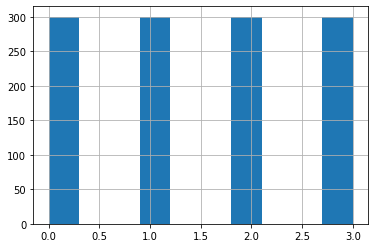

In [8]:
df['class'].hist()

In [9]:
df.groupby('class').size()

class
0    300
1    300
2    300
3    300
dtype: int64

In [10]:
test_indexes = []
append_test_index = test_indexes.append
for class_, data in df.groupby('class'):
    sample = np.random.choice(300, size=90, replace=False)
    append_test_index(data.iloc[sample].index)
test_indexes

[Int64Index([188,  96, 474, 485, 628, 165, 142, 672, 219, 599, 554, 613, 625,
             185, 452, 221, 114,  74, 640,  77, 106, 143, 198, 391, 223, 157,
             113, 450, 100, 644, 144, 630, 679, 171, 646, 641, 663,  91, 653,
             192, 603, 555, 673, 222, 166, 650, 230, 626, 212, 130, 182, 614,
             145, 689, 146,  87, 109, 107, 151, 616, 617, 290,  51, 687, 652,
             111, 530, 386, 677, 648, 655,  99,  58,  93, 153, 661, 163, 609,
             102, 187, 681, 666, 610, 224, 279, 529, 448, 675, 657, 683],
            dtype='int64'),
 Int64Index([728, 297, 240, 701, 238, 321, 578, 426, 326, 235, 308, 721, 456,
             392, 506, 329, 722, 253, 417, 472, 543, 327, 729, 351, 314, 487,
             436, 422,  71, 694, 518, 693, 427, 479, 520, 430, 690, 428, 515,
             469, 583, 465, 362, 301, 411, 503, 359, 715, 582, 527, 231, 241,
             587,  59,  21, 412, 704, 467, 278,  33, 528, 292, 310, 218, 140,
             483, 466, 588, 276, 215, 38

In [11]:
index_test = test_indexes[0].union(test_indexes[1].union(test_indexes[2].union(test_indexes[3])))
index_test

Int64Index([   3,    4,   11,   15,   20,   21,   22,   31,   32,   33,
            ...
            1167, 1168, 1173, 1174, 1176, 1190, 1194, 1195, 1196, 1197],
           dtype='int64', length=360)

In [12]:
index_train = df.index.difference(index_test)
index_train

Int64Index([   0,    1,    2,    5,    6,    7,    8,    9,   10,   12,
            ...
            1185, 1186, 1187, 1188, 1189, 1191, 1192, 1193, 1198, 1199],
           dtype='int64', length=840)

In [13]:
df.loc[index_train].to_pickle('dataset_train_files.pkl')
df.loc[index_test].to_pickle('dataset_test_files.pkl')